In [48]:
import os
import json
from zipfile import ZipFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

### Downloading files from Kaggle using API command

In [2]:
!pip install kaggle --quiet

In [3]:
kaggle_credential = json.load(open('kaggle.json'))

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_credential['username']
os.environ['KAGGLE_KEY'] = kaggle_credential['key']

In [12]:
!kaggle datasets download -d gauravduttakiit/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 135MB/s]


In [15]:
# with ZipFile('resume-dataset.zip', 'r') as zip_ref:
#   zip_ref.extractall()

In [16]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [17]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [18]:
df.shape

(962, 2)

In [19]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [20]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

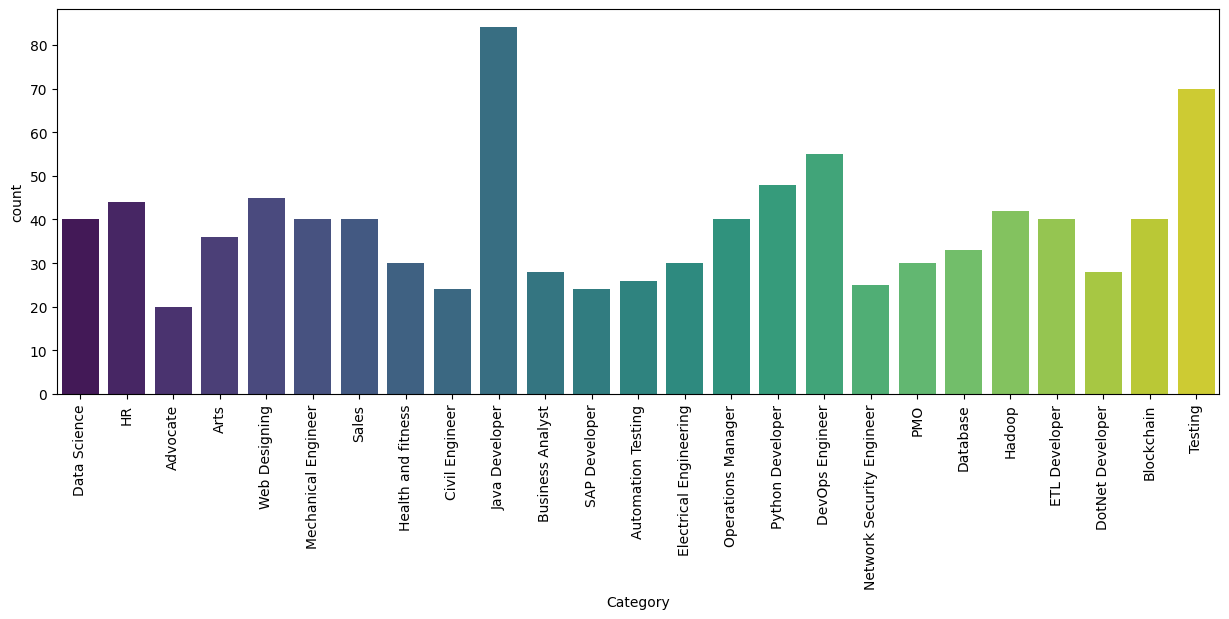

In [31]:
plt.figure(figsize = (15,5))

sns.countplot(x = df['Category'], data = df,  hue = df['Category'], legend = False,  palette = 'viridis')
plt.xticks(rotation = 90)
plt.show()

In [44]:
counts = df['Category'].value_counts()
# this ensures that labels match the sorted column
labels = counts.index

In [43]:
print(df['Category'].value_counts())
print("")
print(df['Category'].value_counts().index)

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Index(['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
       'Web Designing', 'HR', 'Hadoop', 'Blockchain', 'ETL Developer',
       'Operations

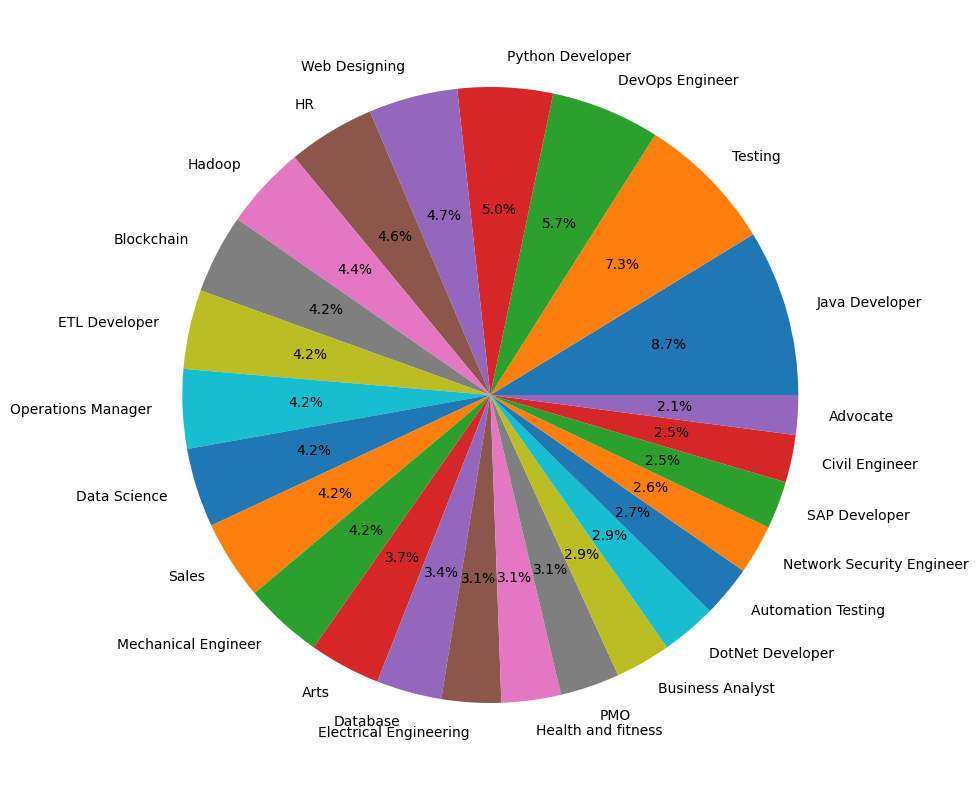

In [45]:
plt.figure(figsize = (15, 10))

plt.pie(counts, labels = labels, autopct= '%1.1f%%')
plt.show()

## Exploring and cleaning resume

Cleaning the given data by removing or replacing certain patterns.
Here's the list [W3School](https://www.w3schools.com/python/python_regex.asp)

Additionally, here's a little detail about the use of re.escape

- Special Characters: Some characters like . and * have special meanings in regex.

- Literal Characters: We want the regex to treat all characters in the list as plain text.

- Escaping: re.escape adds backslashes in front of special characters to neutralize their special meanings.


In [49]:
df['Resume'][21]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [64]:
def cleanResume(Text):
  # replace url that starts with http followed by any non-whitespace characters (\S+), and then a whitespace character (\s) with space
  clean_Text = re.sub('https\S+\s', ' ', Text)
  #replace RT (retweets for Twitter) with space. Ensure "RT" and "cc" are whole words
  clean_Text = re.sub(r'\bRT\b|\bcc\b', ' ', clean_Text)
  #repace hashtag with space
  clean_Text = re.sub('#\S+\s', ' ', clean_Text)
  #replace mentions and emails with space
  clean_Text = re.sub('@\S+\s', ' ', clean_Text)
  #replace special character
  clean_Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_Text)
  #remove non ASCII characters. NOTE: r'' before a string in a regular expression, it means that the string inside
  # is treated exactly as it appears, without interpreting any backslashes as escape sequences.
  clean_Text = re.sub(r'[^\x00-\x7f]', ' ', clean_Text)
  #Replace multiple spaces with a single space
  clean_Text = re.sub('\s+', ' ', clean_Text)

  return clean_Text

In [65]:
cleanResume("my #### $ #  # website looks like this https://helloword and access it ##@gmail.com. Use RT cc ")


'my website looks like this and access it Use '

In [66]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [67]:
df['Resume'][21]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

## Words into categorical values

In [68]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [69]:
lab_enc.fit(df['Category'])
df['Category'] = lab_enc.transform(df['Category'])

In [72]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])

req_text = tfidf.transform(df['Resume'])

In [75]:
req_text

<962x7350 sparse matrix of type '<class 'numpy.float64'>'
	with 164192 stored elements in Compressed Sparse Row format>

## Training the model

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(req_text, df['Category'], test_size = 0.2, random_state = 42, stratify = df['Category'])

In [82]:
print(df.shape, X_train.shape, X_test.shape)

(962, 2) (769, 7350) (193, 7350)



**Why Use OneVsRestClassifier?**

In many real-world classification problems, you might have more than two classes. However, some classifiers, like KNeighborsClassifier, are inherently binary classifiers, meaning they are designed to distinguish between only two classes.

The OneVsRestClassifier strategy allows us to use such binary classifiers for multi-class classification problems. It works as follows:

One-vs-Rest (OvR) Strategy: For a classification problem with N classes, the OneVsRestClassifier creates N binary classifiers. Each classifier is trained to distinguish one class from all other classes combined. For example, if you have classes A, B, and C:
- Classifier 1: A vs. (B and C)
- Classifier 2: B vs. (A and C)
- Classifier 3: C vs. (A and B)


#### **NOTE**:
k-NN doesn't have this iterative training process. The classification process in k-NN is based on the proximity of the stored training samples to the new samples. When you predict a label for a new sample using predict, the algorithm calculates distances between the new sample and all stored training samples to determine the nearest neighbors.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9896373056994818


## Prediction System

In [85]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [86]:
My_resume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [87]:
label_mapping = {index: label for index, label in enumerate(lab_enc.classes_)}

In [88]:
label_mapping

{0: 'Advocate',
 1: 'Arts',
 2: 'Automation Testing',
 3: 'Blockchain',
 4: 'Business Analyst',
 5: 'Civil Engineer',
 6: 'Data Science',
 7: 'Database',
 8: 'DevOps Engineer',
 9: 'DotNet Developer',
 10: 'ETL Developer',
 11: 'Electrical Engineering',
 12: 'HR',
 13: 'Hadoop',
 14: 'Health and fitness',
 15: 'Java Developer',
 16: 'Mechanical Engineer',
 17: 'Network Security Engineer',
 18: 'Operations Manager',
 19: 'PMO',
 20: 'Python Developer',
 21: 'SAP Developer',
 22: 'Sales',
 23: 'Testing',
 24: 'Web Designing'}

In [89]:
import pickle

# Load the trained resume classifier
clf = pickle.load(open('clf.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# clean the input resume
cleaned_resume = cleanResume(My_resume)

# transform the cleaned_resume into vectors using tfidfvectorizer
input_features = tfidf.transform([cleaned_resume])

prediction = clf.predict(input_features)[0]

category_name = label_mapping.get(prediction, "Unknown")

print('Predicted category is:', category_name)
print(prediction)

Predicted category is: Data Science
6
